<a href="https://colab.research.google.com/github/AntonioWanderer/CompPhys22/blob/main/EnergyRoot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
from math import *
import matplotlib.pyplot as plt

In [167]:
a=1
u=100
deg = 12
prec=float("10e-"+str(deg))
c=2*a**2*u

a = hole's half of width

u = hole's depth

In [168]:
def Func(x):
    f=1/tan(sqrt(c*(1-x)))-sqrt(1/x-1)
    return f

def Fder(x):
    f=(1+1/(tan(sqrt(c*(1-x))))**2)*c/(2*sqrt(c*(1-x)))+1/(2*x**2*sqrt(1/x-1))
    return f

Our function Func(x) that's root we found
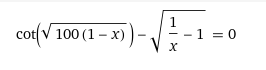

Func(x) graph example for a=2, u = 12.5. Source https://www.wolframalpha.com

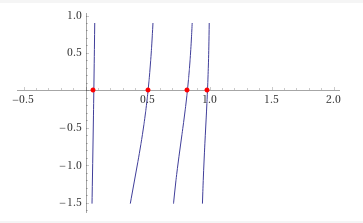

In [169]:
x=1-pi**2/c
if x < 0:
  x = 0
print(x)

0.9506519779945533


Root localization problem: we need to find lowest energy level. In example we have 4 different values. How to localize range where only one smallest root is?

1. Let's find Func(x) = infinity points:

ctg(sqrt(c*(1-x))) = inf

And x != 0

Therefore

sqrt(c*(1-x)) = pi * n

for integer numbers n

2. x values:

x = 1 - (pi * n)**2/c

And x < 1

3. Highest x < 1:

x = 1 - (pi * 1)**2/c

4. x < 1

5. Root localized!

Okay, let's find energy level in interval (x,1) with precision prec

First way is the dichotomy's method:

0.9892412420301359
Dichotomy energy root: -98.92412420330083 from -100 depth 
33 steps


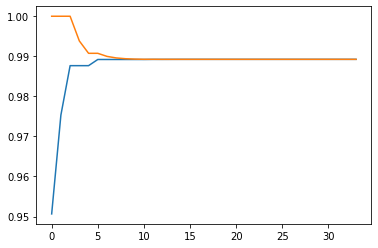

In [170]:
i=0 #steps counter
l1=[x + prec] #list of left borders
l2=[1-prec] #right borders
# +/- prec to avoid infinity values
f1=Func(l1[0])
f2=Func(l2[0])
while l2[-1]-l1[-1]>prec: #stop where root in interval +/- prec
    i=i+1
    l3=(l1[-1]+l2[-1])/2 #new point in the middle of interval
    f3=Func(l3)
    if f1*f3<0: #chosing left or right part in relation to Function's signs
        l2.append(l3)
        l1.append(l1[-1])
        f2=f3
    else:
        l1.append(l3)
        l2.append(l2[-1])
        f1=f3
    #print(l1, l2)
print(l1[-1])
l1res=-l1[-1]*u #real energy values counting
l2res=-l2[-1]*u
print(f"Dichotomy energy root: {(l1res + l2res)/2} from {-u} depth \n{i} steps")
#plt.xscale('log')
plt.plot(l1) #step-by-step borders moving
plt.plot(l2)
plt.show()

x1=(l1res + l2res)/2
i1 = i

From Wolframalpha

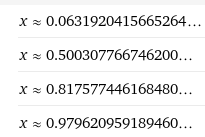

Number of dichotomy's steps is log((1-x)/(2*prec))/log(2)

We divides our interval by 2 in every step

Newton's energy root:  -98.9241242032678 // 5  steps


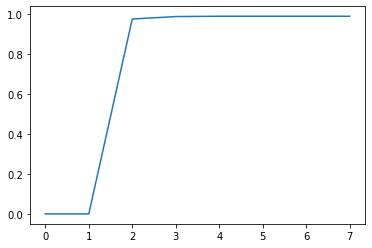

In [171]:
i=0
result = [0, 0]
z=x+prec
t=(x+1)/2
result.append(t)
while (result[-1]-result[-2])**2/abs(2*result[-2]-result[-1]-result[-3])>prec:
    i=i+1
    z=t
    t=z-Func(z)/Fder(z)
    result.append(t)
    #print(t)
z=-z*u
t=-t*u
print("Newton's energy root: ", t,"//", i," steps")
plt.plot(result)
plt.show()
x2 = t
i2 = i

In newton's method we propose that 𝑓 (𝑥𝑛 ) ≈ 𝑓 ′ (𝑥* ) (𝑥𝑛 − 𝑥* ) + 12 𝑓 ′′ (𝑥* ) (𝑥𝑛 − 𝑥* )2

x* is root that we found

xn is x that we have in the step

Then

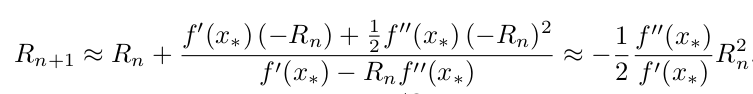

Error decreases as square 

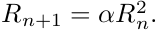

0.9753259889972766 73.40534214802233
0.9878629105494469 67.81702449800396
0.9893089109080259 73.11327753874315
0.9892404561858877 72.80894762410843
0.9892412528446192 72.812454739631
0.9892412418841912 72.81240648325586


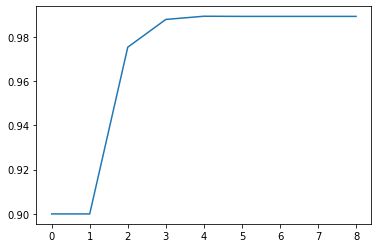

Iterations energy root:  -98.92412420347172 // 6  steps


In [172]:
i=0
result = [0.9,0.9]
#!!!
t=(1+x)/2
result.append(t)
while (result[-1]-result[-2])**2/abs(2*result[-2]-result[-1]-result[-3])>prec:
#for _ in range(5):
    i=i+1
    z=t
    lam = Fder(z)-1
    print(t, lam)
    t=z-1/lam*Func(z)
    result.append(t)
    #print(result, (result[-1]-result[-2])**2/abs(2*result[-2]-result[-1]-result[-3]))

z=-z*u
t=-t*u
plt.plot(result)
plt.show()
print("Iterations energy root: ", t,"//", i," steps")

x3 = t
i3 = i

Iterations method with correcting multiplier 𝜆:

 𝑥 = 𝑥 − 𝜆𝑓 (𝑥)

 not

 𝑥 = 𝑥 + 𝑓 (𝑥) ≡ 𝜙(𝑥)

 

In [173]:
print("precision: e-",deg, "\n", round(-x1/u, deg), i1, "\n", round(-x2/u, deg), i2, "\n", round(-x3/u, deg), i3, "\n")


precision: e- 12 
 0.989241242033 33 
 0.989241242033 5 
 0.989241242035 6 

